#  Customer Segmentation - SQL Structured Query Language (Yapılandırılmış Sorgu Dili)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",181)
import sqlite3
from sqlite3 import Error

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv",encoding="latin-1")

In [3]:
df.sample(7)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
3108,2665,Martha,Allen,Company73,1456710516,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1456955267,0.0,13395,2665,Martha,Allen,Company73,13395,NaN,NaN,NaN,USD,NaN,29.04,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.04,NaN,fedex,11|Ground,NaN,NaN,NaN,8.3565E+14,3.0,1.456711e+09,NaN,authorize.net,NaN,29.04,NaN,8024186122,15120,NaN,1,1456710662,1.456957e+09,1.456777e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15831,13395,75

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [5]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [6]:
df.shape

(4194, 181)

In [7]:
#içerisinde hiç veri olmayan alanlara bakıp
miss=pd.DataFrame(df.isnull().sum(), index=None)
alanlar=miss[miss[0]==4194].index

In [8]:
#siliyoruz
df.drop(alanlar, axis=1, inplace=True)

In [9]:
df.shape

(4194, 147)

In [10]:
#başlığı customer olan sutunları almak için liste oluşturma
dfC=[col for col in df.columns if "Customer" in col]

In [11]:
#yeni data
dfCust=df.loc[:,dfC]

In [12]:
#ilk dokuz karakteri atlayıp sutun isimlerinden lazım olanları almak
a="Products.company"
a[9:]

'company'

In [13]:
for alan in dfCust.columns:
    dfCust.rename(columns={alan: alan[10:]}, inplace=True)
dfCust.rename(columns={"id": "customer_id"}, inplace=True)

In [14]:
dfCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    4194 non-null   int64  
 1   fname          4194 non-null   object 
 2   lname          4194 non-null   object 
 3   company        727 non-null    object 
 4   create_date    4194 non-null   int64  
 5   status         101 non-null    float64
 6   mailing        2114 non-null   float64
 7   tax_exempt     5 non-null      float64
 8   account_id     3 non-null      float64
 9   last_modified  4194 non-null   int64  
 10  customer_type  3771 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 360.5+ KB


In [15]:
dfCust.head()

,customer_id,fname,lname,company,create_date,status,mailing,tax_exempt,account_id,last_modified,customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,1437764316,0.0


In [16]:
dfP=[col for col in df.columns if "Product" in col]

In [17]:
dfProd=df.loc[:,dfP]

In [18]:
a="Products.company"
a[9:]

'company'

In [19]:
for alan in dfProd.columns:
    dfProd.rename(columns={alan: alan[9:]}, inplace=True)
dfProd.rename(columns={"id": "product_id"}, inplace=True)

In [20]:
dfProd.head()

,product_id,status,template,vendor,import_id,name,display_name,list_price,price,sale_price,cost,flags,left_flag,last_modified,taxable,shopping_gtin,shopping_brand,shopping_mpn,shopping_gender,shopping_color,shopping_age,shopping_flags,amazon_asin,amazon_item_type,amazon_price,google_shopping_id,google_shopping_type,google_shopping_cat,shopping_cat,shopping_type,pricegrabber_cat,shopzilla_cat,thefind_cat,quickbooks_id,qb_edit_sequence,short_description,long_description,video,seo_title,seo_description,seo_keywords,seo_header,seo_url,seo_category,unit,packaging,display_packaging,multiple,length,width,height,rx,latex,upc,msds_link,msds_label,lit_link,lit_label,hcpcs,case_qty,override_markup,notes,import_flags,map_price,features_title,warranty,hygienic,user_size,assembly,installation,shipping_length,shipping_width,shipping_height,shipping_weight,handling_time,rotation_link,google_shopping_label,product_option,size,material,arm_style,seat_size,family_id,saved_status
0,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,0.0,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,NaN,Green,NaN,62.0,B00I6GQE0A,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0
1,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.0,1.87,65.0,NaN,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,NaN,NaN,NaN,62.0,B000QF7Y76,health-care-products,NaN,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,NaN,Urinary Drain Bags | MEDLINE - DYNC1674H,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN
2,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,52.50,32896.0,NaN,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,NaN,Blue,NaN,62.0,B002209AOI,health-care-products,NaN,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,800087BB-1438898332,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,NaN,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,PF00342,0.0
3,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,0.0,NaN,1.462595e+09,1.0,NaN,MEDLINE,MDS86615KH,NaN,NaN,NaN,62.0,B00083DG00,health-care-products,NaN,NaN,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Be

In [21]:
dfO=[col for col in df.columns if "Order" in col]

In [22]:
dfOrd=df.loc[:,dfO]

In [23]:
a="Orders.customer_id"
a[7:]

'customer_id'

In [24]:
for alan in dfOrd.columns:
    dfOrd.rename(columns={alan: alan[7:]}, inplace=True)
dfOrd.rename(columns={"id": "order_id"}, inplace=True)

In [25]:
dfOrd.head()

,order_id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,subtotal,tax,shipping,coupon_id,coupon_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,payment_id,payment_code,status,placed_date,updated_date,shipped_date,comments,notes,flags,partial_ship,customer_type,tems.id,tems.parent,tems.product_id,tems.product_name,tems.attribute_names,tems.qty,tems.price,tems.cost,tems.reorder_frequency,tems.flags
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,1,57.20,44.00,NaN,NaN
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",NaN,4,5.00,1.87,NaN,2.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,0,0,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,1,68.78,52.50,NaN,NaN
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,19.56,0.0,9.95,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers,NaN,1,19.56,12.62,NaN,NaN
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,0.0,40,30,991.0,Tens Units,NaN,1,36.05,25.75,NaN,NaN


# SQLite

In [26]:
#SQLite veri tabanına bağlanıyoruz
conn=sqlite3.connect("customer_seg.db")

In [27]:
#veri tabanına üç farklı tablo şeklinde yazdırmış olduk
dfCust.to_sql("Customersnew", con=conn)
dfProd.to_sql("Productsnew", con=conn)
dfOrd.to_sql("Ordersnew", con=conn)

4194

In [28]:
#select yaparak veriyi görmek
conn.execute("SELECT * FROM Customers").fetchall()

[(0,
  797,
  'Christy',
  'Dill',
  'Company0',
  1426018724,
  None,
  None,
  None,
  None,
  1437764306,
  0.0),
 (1,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  None,
  1437764354,
  0.0),
 (2,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  None,
  1437764354,
  0.0),
 (3,
  4,
  'James',
  'Anderson',
  None,
  1386780263,
  None,
  None,
  None,
  None,
  1437762646,
  0.0),
 (4,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (5,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (6,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (7,
  7,
  'peggy ',
  'thompson',
  None,
  1388155947,
  None,
  None,
  None,
  None,
  1437763617,
  0.0),
 (8,
  8,
  'Randy',
  'Pruss',
  None,
  1389303216,
  None,
  None,
  None,
  None,
  1

In [29]:
#conn.close()

In [30]:
#yazılan veriyi okuma
dfc=pd.read_sql("Select * from Customersnew", con=conn)
dfp=pd.read_sql("Select * from Productsnew", con=conn)
dfo=pd.read_sql("Select * from Ordersnew", con=conn)

In [31]:
pd.set_option("display.max_columns", None)

In [32]:
dfo["payment_date"]=pd.to_datetime(dfo["payment_date"], unit="s")
dfo["placed_date"]=pd.to_datetime(dfo["placed_date"], unit="s")
dfo["updated_date"]=pd.to_datetime(dfo["updated_date"], unit="s")

In [33]:
dfo.head()

,index,order_id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,subtotal,tax,shipping,coupon_id,coupon_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,payment_id,payment_code,status,placed_date,updated_date,shipped_date,comments,notes,flags,partial_ship,customer_type,tems.id,tems.parent,tems.product_id,tems.product_name,tems.attribute_names,tems.qty,tems.price,tems.cost,tems.reorder_frequency,tems.flags
0,0,3758,797,Christy,Dill,Company0,3758,NaN,None,NaN,USD,57.20,0.0,9.95,13.0,2.86,None,NaN,None,NaN,64.29,NaN,fedex,11|Ground,NaN,5.7204E+14,3.0,2015-03-10 20:24:59,None,authorize.net,None,64.29,6993607863,510142,1,2015-03-10 20:24:59,2015-08-06 13:40:10,1.426101e+09,None,Insured By Eye4Fraud,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",None,1,57.20,44.00,NaN,NaN
1,1,23,3,John,Smith,Company1,23,NaN,None,NaN,USD,20.00,NaN,9.99,NaN,NaN,None,NaN,None,NaN,29.99,NaN,fedex,11|Ground,NaN,1.28597E+14,3.0,2013-12-03 17:07:35,None,authorize.net,None,29.99,0,0,1,2013-12-03 17:07:35,2015-08-25 18:49:43,1.386103e+09,None,None,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",None,4,5.00,1.87,NaN,2.0
2,2,9531,3,John,Smith,Company1,9531,NaN,None,NaN,USD,68.78,0.0,9.95,NaN,NaN,None,NaN,None,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,None,3.0,2015-12-08 19:40:52,genlee166,authorize.net,None,78.73,0,0,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaN,test order,Test,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",None,1,68.78,52.50,NaN,NaN
3,3,29,4,James,Anderson,None,29,NaN,Ebay,NaN,USD,19.56,0.0,9.95,NaN,NaN,None,0.04,None,NaN,29.55,NaN,None,11|Ground,NaN,7.96468E+14,3.0,2013-12-11 16:44:23,None,None,Credit Card,29.55,None,None,1,2013-12-11 16:44:23,2015-08-25 18:49:43,1.386800e+09,ebay order\rpaid by pay pal,None,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers,None,1,19.56,12.62,NaN,NaN
4,4,30,5,Abraham,Pollak,Company3,30,NaN,None,NaN,USD,36.05,NaN,9.95,NaN,NaN,None,NaN,None,NaN,46.00,NaN,fedex,11|Ground,NaN,6.87398E+14,3.0,2013-12-12 15:19:59,None,None,Credit Card,46.00,None,None,1,2013-12-12 15:19:59,2015-08-25 18:49:43,1.386876e+09,None,None,NaN,NaN,0.0,40,30,991.0,Tens Units,None,1,36.05,25.75,NaN,NaN


In [34]:
import datetime as dt
today=dt.datetime(2021,1,1)
print(today)

2021-01-01 00:00:00


In [35]:
#dosyaları birleştiriyoruz
dfRFM=dfo.loc[:,["customer_id","order_id","total","placed_date"]]

In [36]:
dfRFM.isnull().sum()

customer_id    0
order_id       0
total          0
placed_date    0
dtype: int64

In [38]:
dfRFM.groupby("customer_id")["placed_date"].max()

customer_id
3      2015-12-08 19:40:52
4      2013-12-11 16:44:23
5      2014-09-10 15:40:55
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: placed_date, Length: 3054, dtype: datetime64[ns]

In [39]:
dfRFM.groupby("customer_id")["placed_date"].min()

customer_id
3      2013-12-03 17:07:35
4      2013-12-11 16:44:23
5      2013-12-12 15:19:59
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: placed_date, Length: 3054, dtype: datetime64[ns]

In [40]:
dfrfm=dfRFM.groupby("customer_id").agg({"order_id": "count", "total": "sum", "placed_date":"max"})

In [42]:
dfrfm["Recency"]=(today - dfrfm["placed_date"]).dt.days

In [43]:
dfrfm

,order_id,total,placed_date,Recency
customer_id,,,,
3,2,108.72,2015-12-08 19:40:52,1850
4,1,29.55,2013-12-11 16:44:23,2577
5,3,124.99,2014-09-10 15:40:55,2304
7,1,49.14,2013-12-27 14:52:27,2561
8,1,69.70,2014-01-09 21:33:36,2548
...,...,...,...,...
3730,1,16.06,2016-05-16 14:27:34,1690
3732,1,39.99,2016-05-16 15:32:37,1690
3733,1,989.10,2016-05-16 15:40:46,1690


In [44]:
dfrfm.columns=["frequency", "monetary", "date", "recency"]

In [45]:
dfrfm.drop("date", axis=1, inplace=True)

In [46]:
dfrfm.head()

,frequency,monetary,recency
customer_id,,,
3,2,108.72,1850
4,1,29.55,2577
5,3,124.99,2304
7,1,49.14,2561
8,1,69.70,2548


### KMeans Clustering-Kümelemesi

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib as plt
import numpy as np

In [80]:
model=KMeans(n_clusters=4) 

In [81]:
model=model.fit(dfrfm)

In [82]:
pred=model.predict(dfrfm)

In [83]:
dfrfm["cluster"]=pred

In [84]:
dfrfm.head()

,frequency,monetary,recency,cluster
customer_id,,,,
3,2,108.72,1850,0
4,1,29.55,2577,3
5,3,124.99,2304,3
7,1,49.14,2561,3
8,1,69.70,2548,3


In [85]:
silhouette_score(dfrfm,pred)

0.5213054586831183

In [86]:
def clust(clusters):
    for no_of_cluster in np.arrange(1, clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(dfrfm)
        pred=model.predict(dfrfm)
        score=silhouette_score(dfrfm,pred)
        print("Number of Cluster {}, silhouette{}". format(no_of_cluster, score))

In [87]:
clust=dfrfm.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([0, 3, 3, ..., 0, 0, 0])

In [96]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


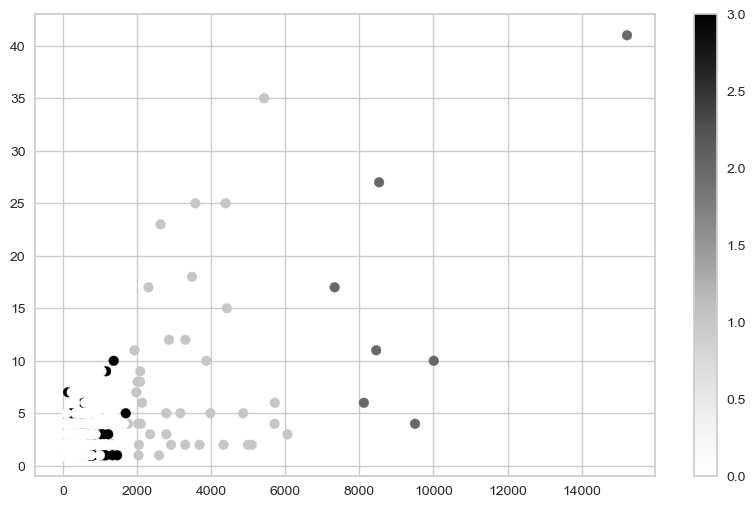

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(dfrfm.monetary, dfrfm.frequency, c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [94]:
#ÇALIŞAN KOD
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(dfrfm)
        pred=model.predict(dfrfm)
        score=silhouette_score(dfrfm,pred)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [95]:
clust(10)

Cluster  2  score:  0.9354769306365682
Cluster  3  score:  0.8878166240411856
Cluster  4  score:  0.5213054586831183
Cluster  5  score:  0.5573159722965558
Cluster  6  score:  0.5573399336449836
Cluster  7  score:  0.5683535842013373
Cluster  8  score:  0.5016302064209737
Cluster  9  score:  0.5120324566261127
Cluster  10  score:  0.5102625409319484


In [73]:
from yellowbrick.cluster import KElbowVisualizer

In [74]:
model=KMeans()

In [75]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

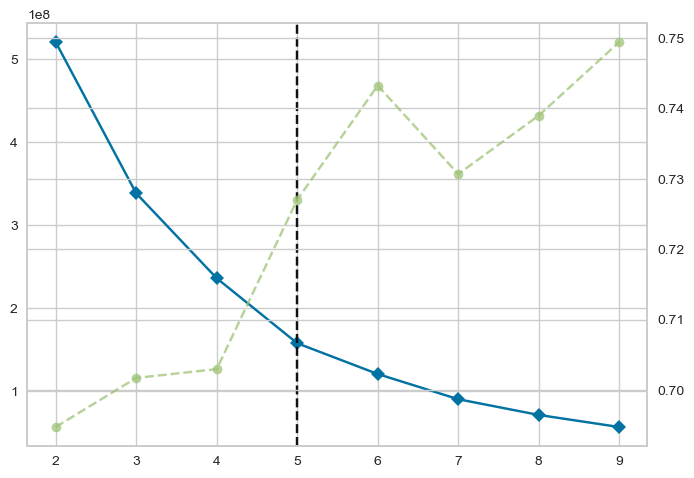

In [76]:
visualizer.fit(dfrfm)

In [77]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>